# Polynomial Linear Regression Model

### importing Libraries

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

### importing dataset and creating MOF and DVV

In [76]:
data=pd.read_csv("Position_Salaries.csv")

# creating matrix of feature and dependent variable vector
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [77]:
print(pd.DataFrame(x),"\n\n",pd.DataFrame(y))

    0
0   1
1   2
2   3
3   4
4   5
5   6
6   7
7   8
8   9
9  10 

          0
0    45000
1    50000
2    60000
3    80000
4   110000
5   150000
6   200000
7   300000
8   500000
9  1000000


### Buidling linear regression model

here we are going to split as this dataset is different kind of dataset

In [78]:
from sklearn.linear_model import LinearRegression

# now build the model 
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [79]:
# now our model is build model you can say that is dataset is linear or not 
# from the performance of the 
lr.predict([[1]])

array([-114454.54545455])

### Build a polynomial model

In [80]:
# first convert normal matrix of feature to polynomial matrix of feature (polynomialFeture class is used) and just
#  train it like multiple linear regression model 

from sklearn.preprocessing import PolynomialFeatures

# check result by changing degree
polyRegression=PolynomialFeatures(degree=2)
x_poly=polyRegression.fit_transform(x)

In [81]:
print(x_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [82]:
# build Polynomial linear Regression model like a MLRM 

from sklearn.linear_model import LinearRegression
plr=LinearRegression()
plr.fit(x_poly,y)

LinearRegression()

In [83]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## visulizing simple regression model

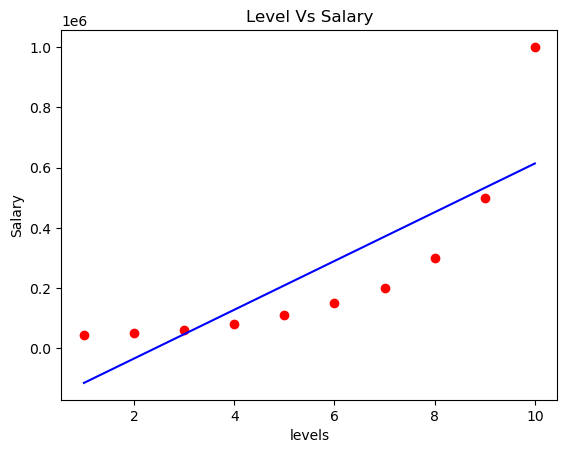

In [84]:
plt.scatter(x,y,color="red")
pred=lr.predict(x)
plt.plot(x,pred,color="blue")
plt.ylabel("Salary")
plt.xlabel("levels")
plt.title("Level Vs Salary")
plt.show()

# as we can see that the simple linear model is not well adapted

## Visualizing polynomial linear model

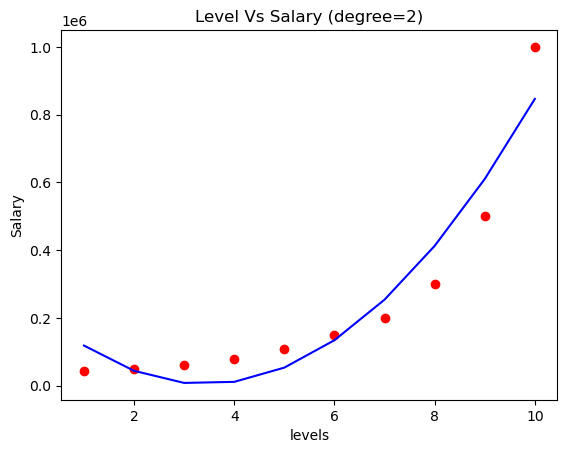

In [85]:
plt.scatter(x,y,color="red")
pred=plr.predict(x_poly)
plt.plot(x,pred,color="blue")
plt.ylabel("Salary")
plt.xlabel("levels")
plt.title("Level Vs Salary (degree=2)")
plt.show()

# here we can see that the dataset look very good with the Polynomial regression 


### for degree 3

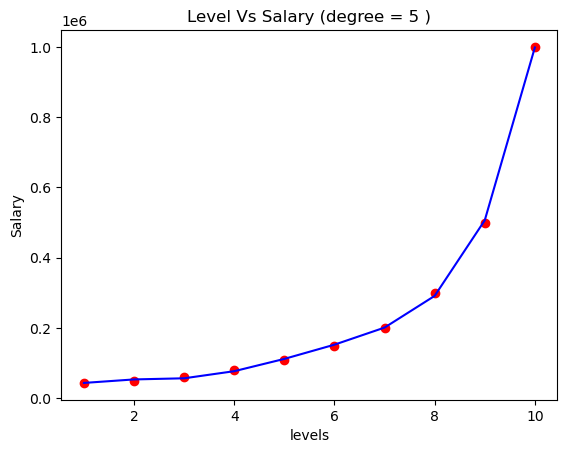

In [102]:
# lets try to change and see changing degree 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# changing degree and getting new poly with polynomialFeature
polyRegression=PolynomialFeatures(degree=5)
x_poly=polyRegression.fit_transform(x)

#building model
plr=LinearRegression()
plr.fit(x_poly,y)

# plotting 
plt.scatter(x,y,color="red")
pred=plr.predict(x_poly)
plt.plot(x,pred,color="blue")
plt.ylabel("Salary")
plt.xlabel("levels")
plt.title("Level Vs Salary (degree = 5 )")
plt.show()

# Predicting result using SLRM

In [103]:
lr.predict([[6.5]])
# this is not good and it is a wrong prediction

array([330378.78787879])

# Predicting result using PLRM

In [105]:
# in order to apply PLRM on it first we have to convert 6.5 to polynomial MOF using PolynomialFeatures 
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=5)
plr.predict(pr.fit_transform([[6.5]]))

array([174878.07765173])